Bagging与随机森林之三
===

# 6.使用随机森林进行回归预测

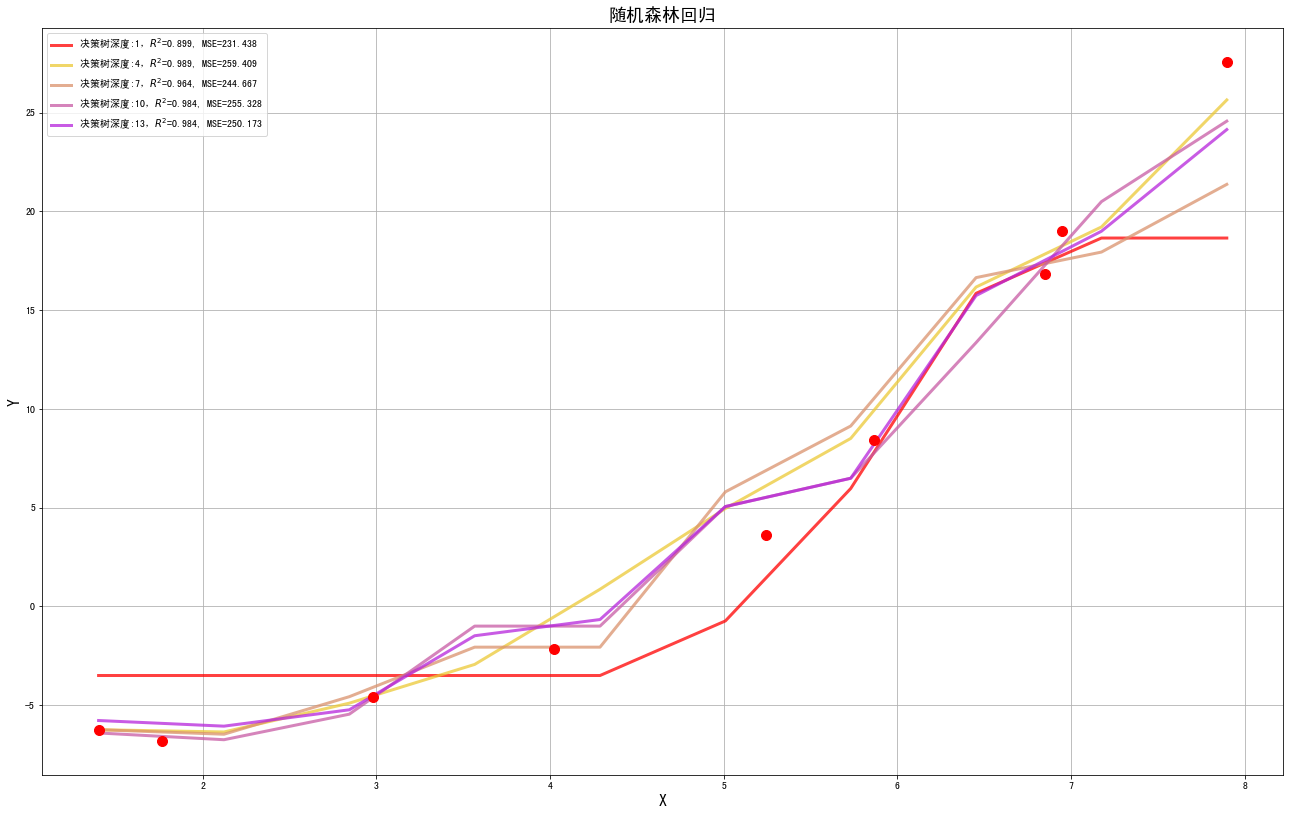

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import matplotlib as mpl

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9

x = np.asarray([1.40015721,1.76405235,2.97873798,4.02272212,5.2408932,5.86755799,6.84864279,6.95008842,7.89678115], dtype=np.float)
y = np.asarray([-6.22959012,-6.80028513,-4.58779845,-2.1475575,3.62506375,8.40186804,16.84301125,18.99745441,27.56686965])

x.shape = -1, 1
y.shape = -1, 1

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

deep_length = 15
model = RandomForestRegressor(n_estimators=10)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 3)  # 阶

label = '随机森林回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    model.set_params(max_depth=d)
    model.fit(x, y.ravel())

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)# 误差平方和
    label1 = u'决策树深度:%d，$R^2$=%.3f, MSE=%.3f' % (d, s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))